<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/openeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do register at
https://dataspace.copernicus.eu/

Follow the instructions at
https://openeo.org/documentation/1.0/cookbook/#chapter-1

In [1]:
pip install openeo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/182.9 kB 986.4 kB/s eta 0:00:00


Below is the code to download the sentinel Image

*   AOI is taken in geojson format I used Geojson.io to define AOI
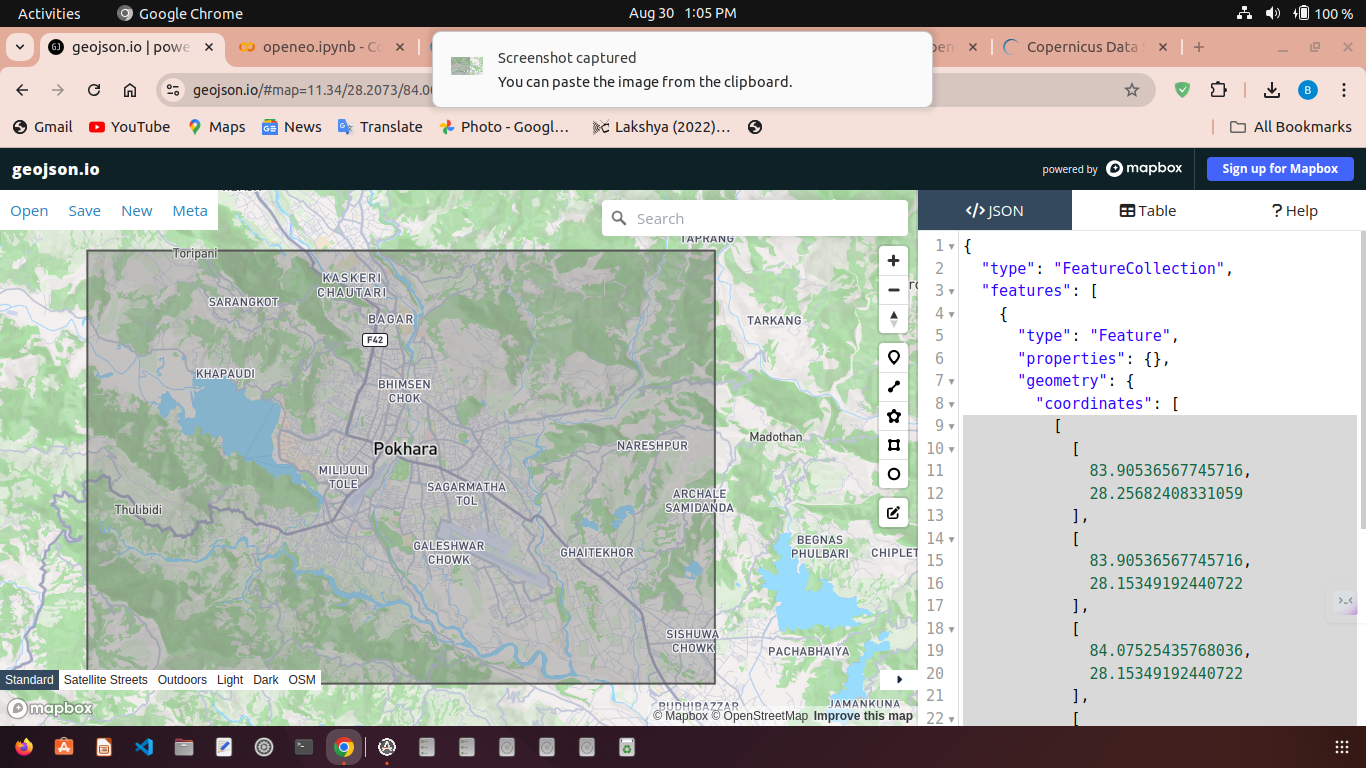



In [3]:

import openeo

# Connect to the openEO backend and authenticate
eoconn = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

# Define the area of interest (AOI) and date range
aoi = {
    "type": "Polygon",
    "coordinates": [
          [
            [
              83.80715053048561,
              28.313497840708266
            ],
            [
              83.80715053048561,
              28.056513297761512
            ],
            [
              84.33698891230364,
              28.056513297761512
            ],
            [
              84.33698891230364,
              28.313497840708266
            ],
            [
              83.80715053048561,
              28.313497840708266
            ]
          ]
    ]
}
date = ["2020-05-06", "2020-05-30"]

# Load the Sentinel-2 data cube
s2_data = eoconn.load_collection(
    "SENTINEL2_L2A",  # Sentinel-2 L2A product
    spatial_extent=aoi,
    temporal_extent=date,
    bands=[
        "B01", "B02", "B03", "B04", "B05", "B06", "B07",
        "B08", "B8A", "B09", "B11", "B12"
    ]
)

# Execute the process as a batch job
job = s2_data.execute_batch(out_format="GTiff")

# Wait for the job to finish and get the results
job_result = job.get_results()

# Download all GeoTIFF files generated by the job
files = job_result.download_files(target=".")

#Print the paths of downloaded files

print("Downloaded files:", files)

Authenticated using refresh token.
0:00:00 Job 'j-240904942e66435cbf4167b321b5ea8f': send 'start'
0:00:14 Job 'j-240904942e66435cbf4167b321b5ea8f': created (progress 0%)
0:00:19 Job 'j-240904942e66435cbf4167b321b5ea8f': created (progress 0%)
0:00:25 Job 'j-240904942e66435cbf4167b321b5ea8f': created (progress 0%)
0:00:33 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:00:45 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:01:00 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:01:15 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:01:34 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:01:59 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:02:29 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:03:06 Job 'j-240904942e66435cbf4167b321b5ea8f': running (progress N/A)
0:03:53 Job 'j-240904942e66435cbf4167b321b5ea8f': finished (progress 100%)
Downloaded files: [PosixPat

The created job can be viewed at
https://openeo.dataspace.copernicus.eu/

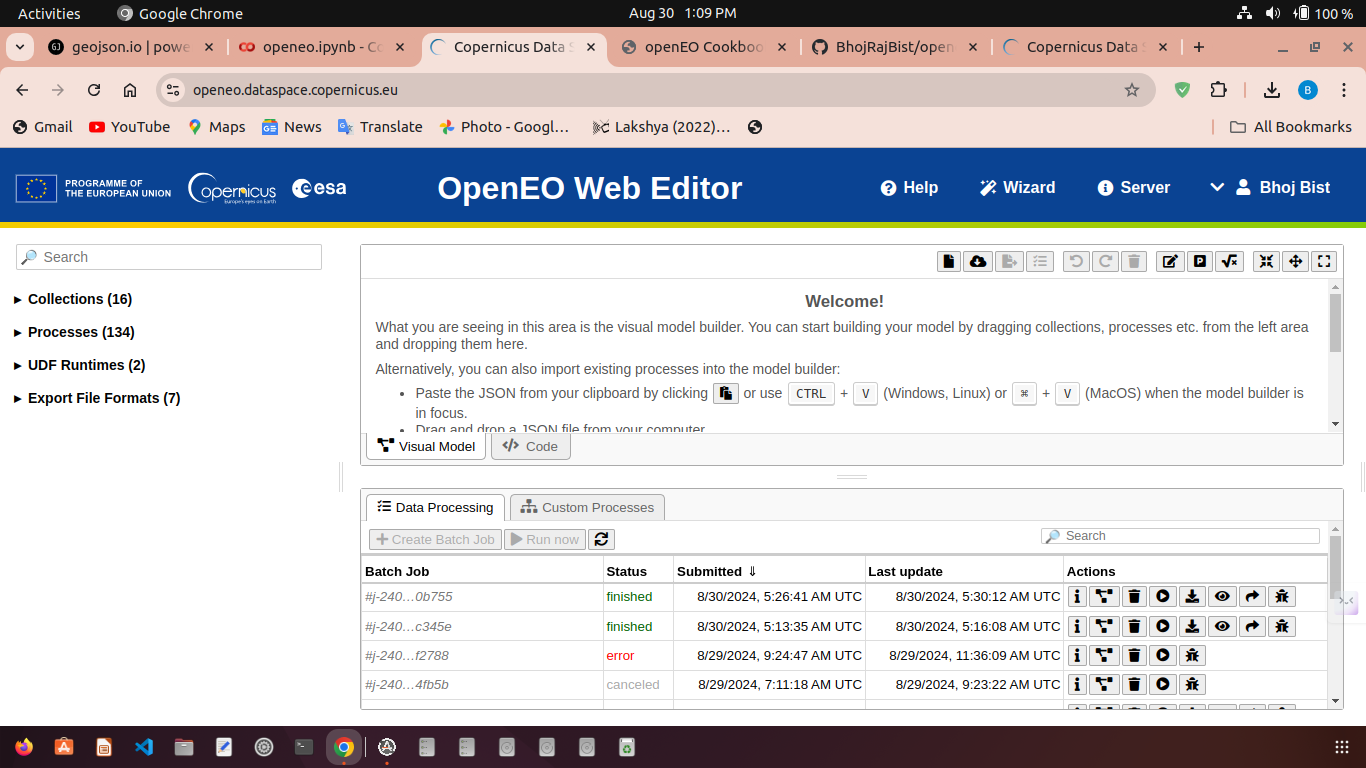

The tiff file when visualized in Qgis
![image.png](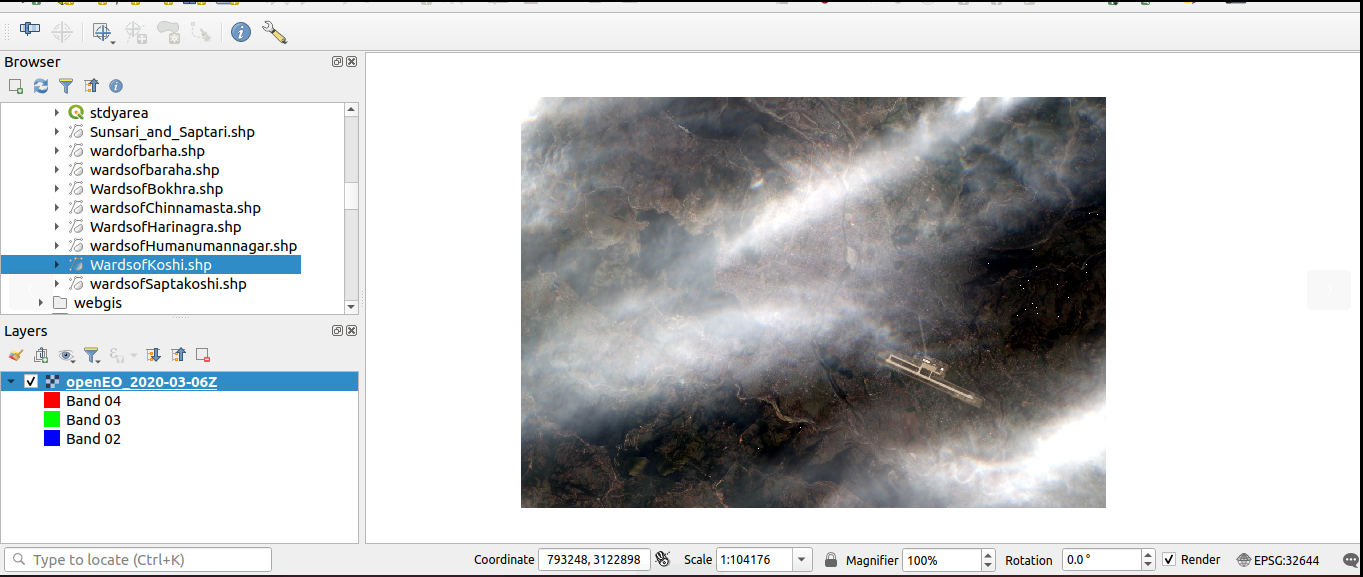
)
